<a href="https://colab.research.google.com/github/shivabommera143/Data_analysis/blob/main/Zara_sales_analysed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries and reading dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files

df=pd.read_csv("/content/Zara_Sales_Analysis.csv", sep=';')

#Printing the top 10 rows to understand our data better
df.head(10)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
5,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-...,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar a...,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN
6,189118,Front of Store,Yes,Clothing,Yes,952,Zara,https://www.zara.com/us/en/faux-leather-puffer...,278112470-800-2,FAUX LEATHER PUFFER JACKET,Faux leather puffer jacket. High collar and lo...,69.99,USD,2024-02-19T08:50:09.688951,jackets,MAN
7,182157,Aisle,No,Clothing,No,2421,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,322972485-431-46,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.00,USD,2024-02-19T08:50:10.200777,jackets,MAN
8,141861,Aisle,Yes,Clothing,Yes,1916,Zara,https://www.zara.com/us/en/100-wool-suit-jacke...,313854165-401-46,100% WOOL SUIT JACKET,Jacket made of Italian wool. Pointed lapel col...,169.00,USD,2024-02-19T08:50:10.880741,jackets,MAN
9,137121,Aisle,No,Clothing,Yes,656,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.00,USD,2024-02-19T08:50:11.380061,jackets,MAN


Data exploration


In [ ]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

In [ ]:
df.dtypes

,0
Product ID,int64
Product Position,object
Promotion,object
Product Category,object
Seasonal,object
Sales Volume,int64
brand,object
url,object
sku,object
name,object


In [ ]:
df.shape

(252, 16)

In [ ]:
df.describe()

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


Checking for null values, duplicates and outliers

In [ ]:
df.isnull().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
sku,0
name,1


The below are some methods to handle the missimng categorical value:                    

1.   Fill the data with any placeholder like "Unknown", "Missing_value', etc
2.   Fill it with most frequent value
3.   Drop those rows (if they are not many and not much important)
4.  Use predictive modelling

We will use the first method here.

In [ ]:
df['name'] = df['name'].fillna('Unknown')
df['description'] = df['description'].fillna('No description available')
df.isnull().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
sku,0
name,0


In [ ]:
df.duplicated().sum()

np.int64(0)

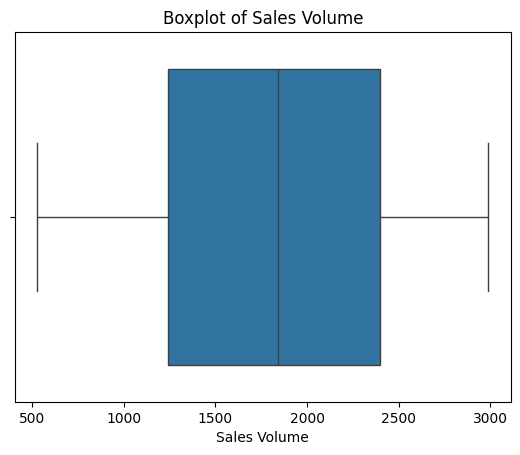

In [ ]:
#checking outliers in Sales Volume
sns.boxplot(x=df['Sales Volume'])
plt.title('Boxplot of Sales Volume')
plt.show()


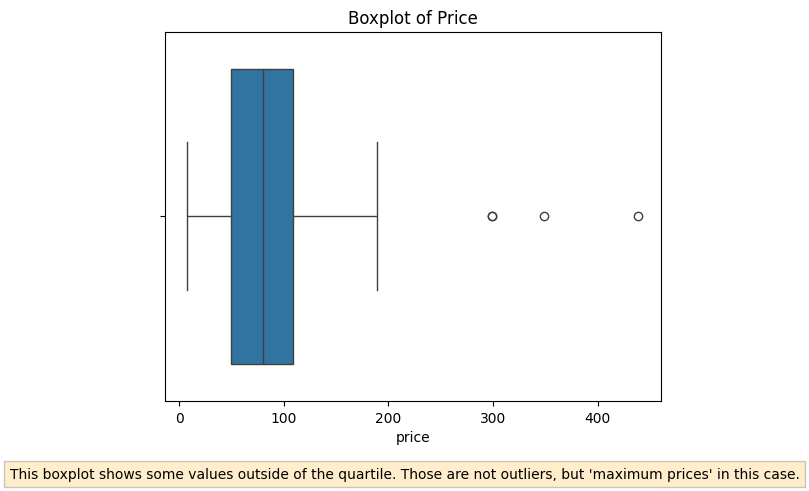

In [ ]:
#checking outliers in Price
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.figtext(0.5, -0.05, "This boxplot shows some values outside of the quartile. Those are not outliers, but 'maximum prices' in this case.", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2})
plt.show()

Observing numerical data:

In [ ]:
df[["price", "Sales Volume"]].describe()

,price,Sales Volume
count,252.000000,252.000000
mean,86.252540,1823.702381
std,52.083205,697.703748
min,7.990000,529.000000
25%,49.900000,1243.000000
50%,79.900000,1839.500000
75%,109.000000,2398.750000
max,439.000000,2989.000000


Observing numerical and categorical data

In [ ]:
df['terms'].value_counts()

,count
terms,
jackets,140
sweaters,41
t-shirts,32
shoes,31
jeans,8


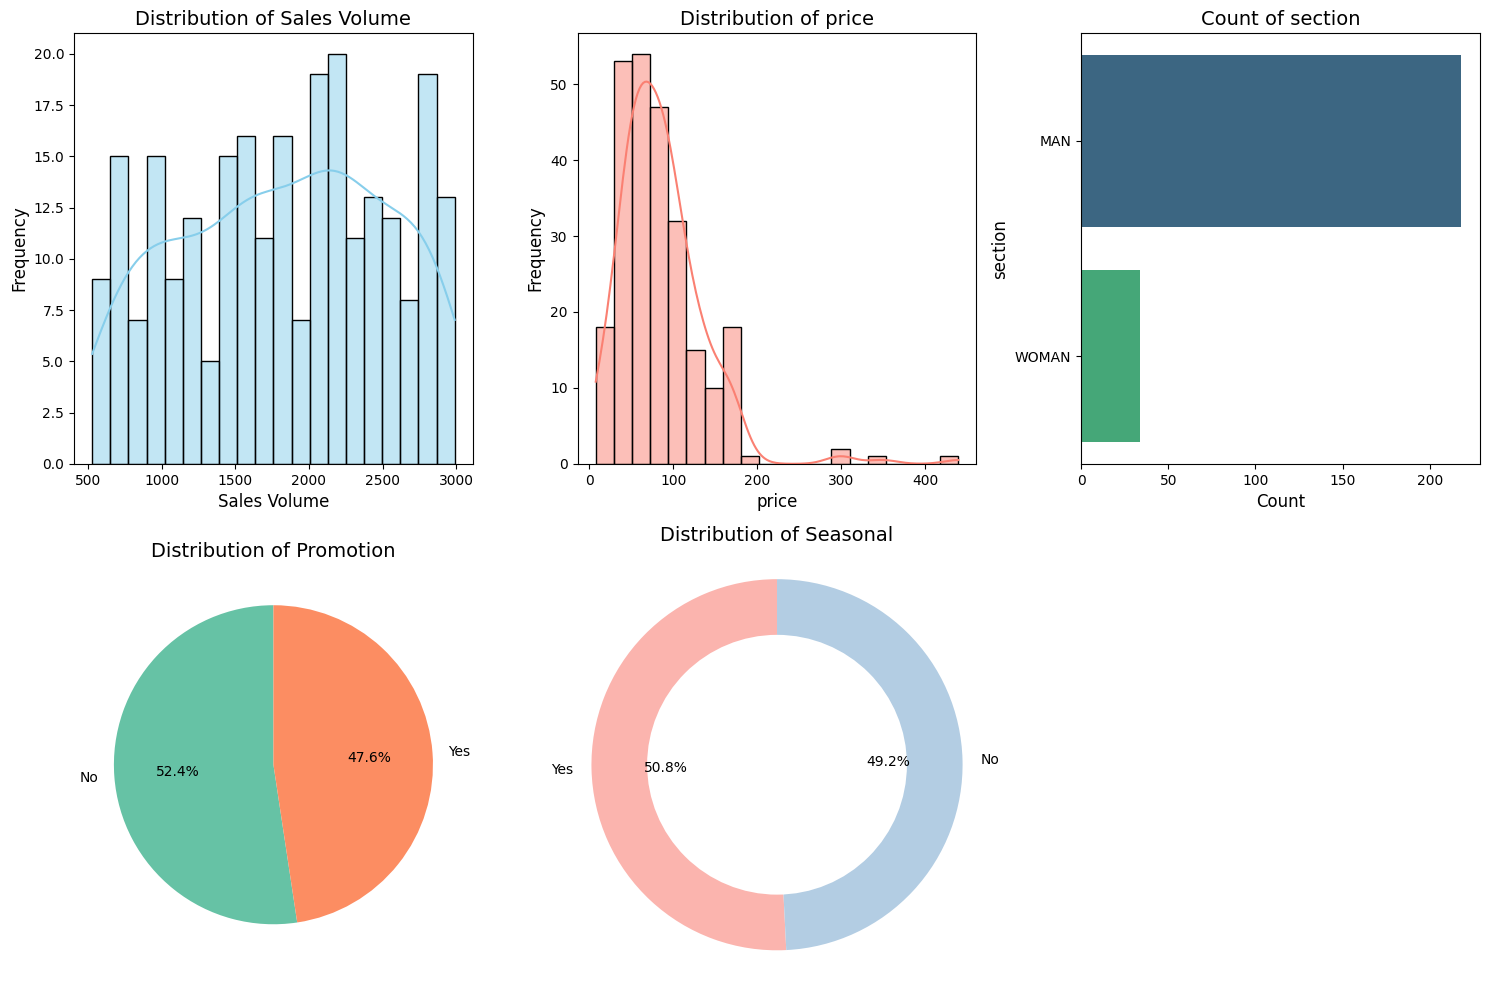

In [ ]:
numerical_cols_for_viz = ["Sales Volume", "price"]
categorical_cols_for_viz = ["section"]
pie_chart_col = "Promotion"
donut_chart_col = "Seasonal"

total_plots = len(numerical_cols_for_viz) + len(categorical_cols_for_viz) + 2
n_cols = 3
n_rows = (total_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

for i, col in enumerate(numerical_cols_for_viz):
    color = 'skyblue' # Default color
    if col == 'price':
        color = 'salmon' # Change color for price histogram
    sns.histplot(data=df, x=col, ax=axes[i], bins=20, kde=True, color=color)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for i, col in enumerate(categorical_cols_for_viz):
    sns.countplot(data=df, y=col, ax=axes[len(numerical_cols_for_viz) + i], palette='viridis', hue=col, legend=False)
    axes[len(numerical_cols_for_viz) + i].set_title(f'Count of {col}', fontsize=14)
    axes[len(numerical_cols_for_viz) + i].set_xlabel('Count', fontsize=12)
    axes[len(numerical_cols_for_viz) + i].set_ylabel(col, fontsize=12)

pie_ax = axes[len(numerical_cols_for_viz) + len(categorical_cols_for_viz)]
df[pie_chart_col].value_counts().plot(kind='pie', ax=pie_ax, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
pie_ax.set_title(f'Distribution of {pie_chart_col}', fontsize=14)
pie_ax.set_ylabel('')

donut_ax = axes[len(numerical_cols_for_viz) + len(categorical_cols_for_viz) + 1]
df[donut_chart_col].value_counts().plot(kind='pie', ax=donut_ax, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
donut_ax.set_title(f'Distribution of {donut_chart_col}', fontsize=14)
donut_ax.set_ylabel('')

centre_circle = plt.Circle((0,0),0.70,fc='white')
donut_ax.add_artist(centre_circle)

donut_ax.axis('equal')

for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Sales Volume and Price relationship

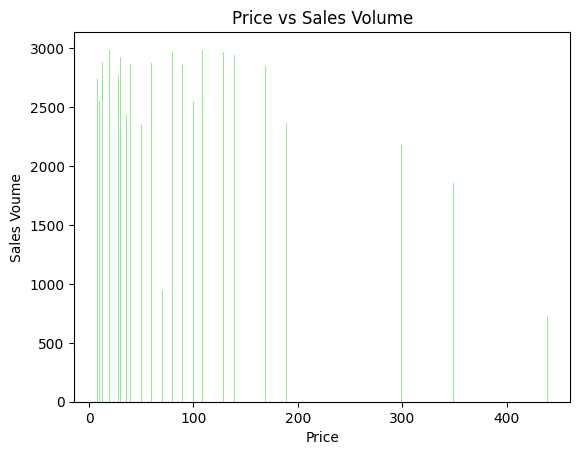

In [ ]:
plt.bar(df['price'], df['Sales Volume'], color='lightgreen')
plt.xlabel('Price')
plt.ylabel('Sales Voume')
plt.title('Price vs Sales Volume')
plt.show()

In [ ]:
average_sales_volume = df['Sales Volume'].mean()
average_price = df['price'].mean()

print(f"Average Sales Volume: {average_sales_volume:.2f}")
print(f"Average Price: {average_price:.2f}")

Average Sales Volume: 1823.70
Average Price: 86.25


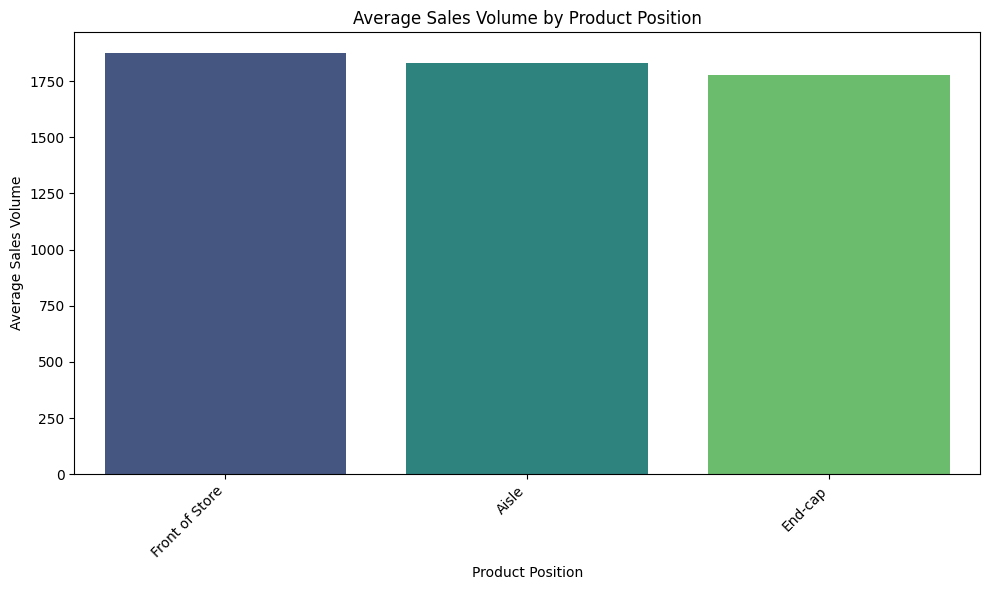

In [ ]:
average_sales_by_position = df.groupby('Product Position')['Sales Volume'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_sales_by_position.index, y=average_sales_by_position.values, palette='viridis', hue=average_sales_by_position.index, legend=False)
plt.title('Average Sales Volume by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Average Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 highest sold products

In [ ]:
top_10_sold_products = df.sort_values(by='Sales Volume', ascending=False).head(20)
display(top_10_sold_products[['name', 'terms', 'Sales Volume']])

,name,terms,Sales Volume
125,PLAID TIE DYE OVERSHIRT,jackets,2989
237,SUIT JACKET IN 100% LINEN,t-shirts,2985
246,RIB COLLAR JACKET,jackets,2973
5,CONTRASTING COLLAR JACKET,jackets,2968
4,DOUBLE FACED JACKET,jackets,2942
34,FAUX LEATHER BOMBER JACKET,jackets,2931
66,COTTON JACKET,jackets,2929
204,RIPPED STRAIGHT FIT JEANS,jeans,2914
181,GATHERED WAIST KNIT SWEATER,sweaters,2901
206,PURL KNIT SWEATER,sweaters,2887


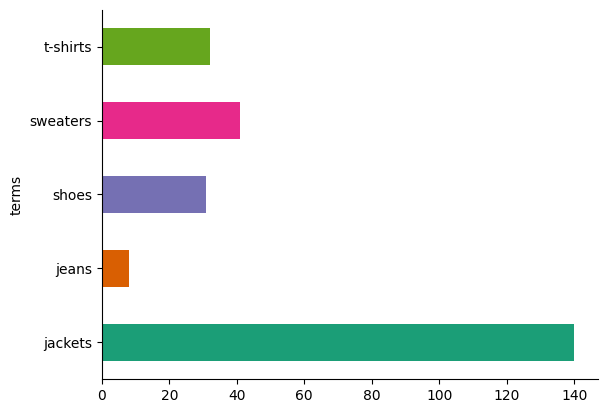

In [ ]:
df.groupby('terms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

10 least sold products

In [ ]:
top_10_least_sold_products = df.sort_values(by='Sales Volume').head(20)
display(top_10_sold_products[['name', 'terms', 'Sales Volume']])

,name,terms,Sales Volume
125,PLAID TIE DYE OVERSHIRT,jackets,2989
237,SUIT JACKET IN 100% LINEN,t-shirts,2985
246,RIB COLLAR JACKET,jackets,2973
5,CONTRASTING COLLAR JACKET,jackets,2968
4,DOUBLE FACED JACKET,jackets,2942
34,FAUX LEATHER BOMBER JACKET,jackets,2931
66,COTTON JACKET,jackets,2929
204,RIPPED STRAIGHT FIT JEANS,jeans,2914
181,GATHERED WAIST KNIT SWEATER,sweaters,2901
206,PURL KNIT SWEATER,sweaters,2887


In [ ]:
print(f" maximum price = {df['price'].max()}")
print(f" minimum price = {df['price'].min()}")
print(f" average price = {df['price'].mean()}")

 maximum price = 439.0
 minimum price = 7.99
 average price = 86.25253968253969


Average sales volume by promotional status and seasonal sales

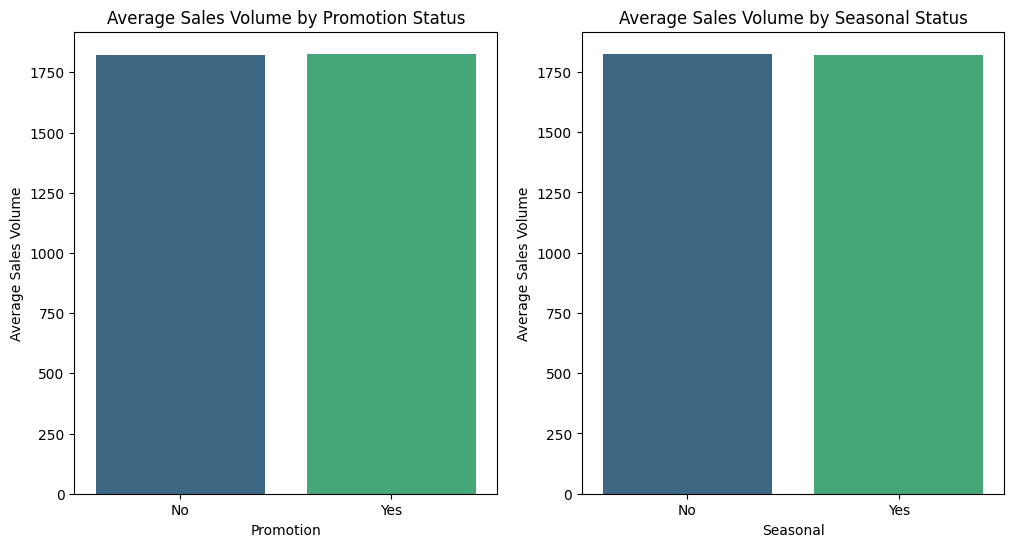

In [ ]:
average_sales_by_promotion = df.groupby('Promotion')['Sales Volume'].mean()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=average_sales_by_promotion.index, y=average_sales_by_promotion.values, palette='viridis', hue=average_sales_by_promotion.index, legend=False)
plt.title('Average Sales Volume by Promotion Status')
plt.xlabel('Promotion')
plt.ylabel('Average Sales Volume')

plt.subplot(1,2,2)
average_sales_by_seasonal = df.groupby('Seasonal')['Sales Volume'].mean()
sns.barplot(x=average_sales_by_seasonal.index, y=average_sales_by_seasonal.values, palette='viridis', hue=average_sales_by_seasonal.index, legend=False)
plt.title('Average Sales Volume by Seasonal Status')
plt.xlabel('Seasonal')
plt.ylabel('Average Sales Volume')
plt.show()

In [ ]:
df['Seasonal'].value_counts()

,count
Seasonal,
Yes,128
No,124


Total Revenue

In [ ]:
df['Total']=df['price'] * df['Sales Volume']
df['Total']

,Total
0,56431.77
1,110526.00
2,286380.00
3,202272.00
4,408938.00
...,...
247,171366.00
248,353298.00
249,32916.66
250,29173.40


In [ ]:
top_10_revenue_products = df.sort_values(by='Total', ascending=False).head(10)
display(top_10_revenue_products[['name', 'terms', 'Sales Volume', 'price', 'Total']])

,name,terms,Sales Volume,price,Total
60,VINTAGE EFFECT LEATHER BOMBER JACKET,jackets,2179,299.0,651521.0
38,SUEDE JACKET,jackets,1860,349.0,649140.0
87,LONGLINE QUILTED JACKET,jackets,2849,169.0,481481.0
67,WOOL BLEND TEXTURED JACKET,jackets,2366,189.0,447174.0
169,CASHMERE BLEND KNIT SWEATER,sweaters,2572,169.0,434668.0
4,DOUBLE FACED JACKET,jackets,2942,139.0,408938.0
99,POCKET JACKET,jackets,2839,139.0,394621.0
29,FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,jackets,2477,159.0,393843.0
100,SLIM FIT SUIT JACKET,jackets,2801,139.0,389339.0
22,LEATHER JACKET,jackets,1290,299.0,385710.0


Download the modified csv file

In [ ]:
# prompt: How much average price is more in promotional yes than pormotional no. in values and percentage

# Calculate the average price for 'Promotion' == 'Yes' and 'Promotion' == 'No'
average_price_promo_yes = df[df['Promotion'] == 'Yes']['price'].mean()
average_price_promo_no = df[df['Promotion'] == 'No']['price'].mean()

print(f"Average price for Promotion 'Yes': {average_price_promo_yes:.2f}")
print(f"Average price for Promotion 'No': {average_price_promo_no:.2f}")

# Calculate the difference in average price
price_difference = average_price_promo_yes - average_price_promo_no

print(f"\nDifference in average price (Yes - No): {price_difference:.2f}")

# Calculate the percentage difference
if average_price_promo_no != 0:
    percentage_difference = (price_difference / average_price_promo_no) * 100
    print(f"Percentage difference in average price compared to 'No': {percentage_difference:.2f}%")
else:
    print("Cannot calculate percentage difference as the average price for 'Promotion' == 'No' is zero.")

Average price for Promotion 'Yes': 92.41
Average price for Promotion 'No': 80.65

Difference in average price (Yes - No): 11.76
Percentage difference in average price compared to 'No': 14.58%


In [ ]:
df.to_csv('Zara_analysed_sales.csv', encoding = 'utf-8-sig')
files.download('Zara_analysed_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>